Let's start with a model that's very effective at learning Cats v Dogs.
It's similar to the previous models that you have used, but I have updated the layers definition. Note
that there are now 4 convolutional layers with 32, 64, 128 and 128 convolutions respectively.
Also, this will train for 100 epochs, because I want to plot the graph of loss and accuracy.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-06-15 04:07:15--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.45.16, 142.250.73.208, 142.250.65.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.45.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   188MB/s    in 0.3s    

2022-06-15 04:07:15 (188 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip='/tmp/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train') #/tmp/cats_and_dogs_filtered/train
validation_dir = os.path.join(base_dir, 'validation') #/tmp/cats_and_dogs_filtered/validation

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') # /tmp/cats_and_dogs_filtered/train/cats
# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # /tmp/cats_and_dogs_filtered/train/dogs

# # Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # /tmp/cats_and_dogs_filtered/validation/cats
# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs') # /tmp/cats_and_dogs_filtered/validation/dogs


In [3]:
# Create Sequential API Model
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4), 
              metrics=['accuracy'])

In [4]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, # This is the source directory for training images
                                                    target_size=(150, 150), # All images will be resized to 150x150
                                                    batch_size=20,
                                                    # Since we use binary_crossentropy loss, we need binary labels
                                                    class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
# Training Model
history = model.fit(train_generator,
                    steps_per_epoch=100, # 2000 images = batch_size * steps
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=50, # 1000 images = batch_size * steps
                    verbose=2)

Epoch 1/100
100/100 - 21s - loss: 0.6916 - accuracy: 0.5265 - val_loss: 0.7017 - val_accuracy: 0.5000 - 21s/epoch - 206ms/step
Epoch 2/100
100/100 - 9s - loss: 0.6819 - accuracy: 0.5720 - val_loss: 0.6710 - val_accuracy: 0.6080 - 9s/epoch - 86ms/step
Epoch 3/100
100/100 - 8s - loss: 0.6675 - accuracy: 0.5975 - val_loss: 0.6662 - val_accuracy: 0.6010 - 8s/epoch - 85ms/step
Epoch 4/100
100/100 - 9s - loss: 0.6502 - accuracy: 0.6070 - val_loss: 0.6425 - val_accuracy: 0.6280 - 9s/epoch - 92ms/step
Epoch 5/100
100/100 - 8s - loss: 0.6266 - accuracy: 0.6500 - val_loss: 0.6325 - val_accuracy: 0.6460 - 8s/epoch - 83ms/step
Epoch 6/100
100/100 - 8s - loss: 0.6073 - accuracy: 0.6715 - val_loss: 0.6162 - val_accuracy: 0.6720 - 8s/epoch - 82ms/step
Epoch 7/100
100/100 - 8s - loss: 0.5820 - accuracy: 0.6905 - val_loss: 0.5843 - val_accuracy: 0.6850 - 8s/epoch - 83ms/step
Epoch 8/100
100/100 - 8s - loss: 0.5649 - accuracy: 0.7030 - val_loss: 0.5809 - val_accuracy: 0.6840 - 8s/epoch - 82ms/step
Epoch

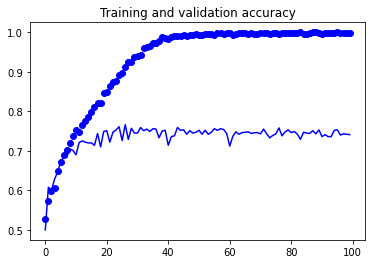

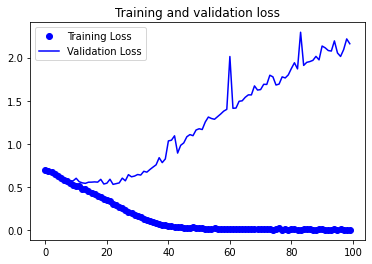

In [8]:
# Import library
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The Training Accuracy is close to 100%, and the validation accuracy is in the 70%-80% range. This is
a great example of overfitting -- which in short means that it can do very well with images it has
seen before, but not so well with images it hasn't. Let's see if we can do better to avoid overfitting --
and one simple method is to augment the images a bit. If you think about it, most pictures of a cat
are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance
between the eyes and ears will always be quite similar too.
What if we tweak with the images to change this up a bit -- rotate the image, squash it, etc. That's
what image augementation is all about. And there's an API that makes it easy...
Now take a look at the ImageGenerator. There are properties on it that you can use to augment the
image.

In [9]:
# Updated to do image augmentation
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

These are just a few of the options available (for more, see the Keras documentation. Let's quickly go over what we just wrote:
*   rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
*   width_shift and height_shift are ranges (as a fraction of total width or height) within which to
randomly translate pictures vertically or horizontally.
* shear_range is for randomly applying shearing transformations.
* zoom_range is for randomly zooming inside pictures.
* horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when
there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* fill_mode is the strategy used for filling in newly created pixels, which can appear after a
rotation or a width/height shift.
Here's some code where we've added Image Augmentation. Run it to see the impact.






In [10]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-06-15 04:26:14--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.1.208, 172.253.62.128, 142.250.188.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.1.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   322MB/s    in 0.2s    

2022-06-15 04:26:14 (322 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [11]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Create Model Arcitechture Sequential API
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# initiate model to compile
model.compile(loss='binary_crossentropy',
optimizer=RMSprop(lr=1e-4),
metrics=['accuracy'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, # This is the source directory for training images
                                                    target_size=(150, 150), # All images will be resized to 150x150
                                                    batch_size=20,
                                                    # Since we use binary_crossentropy loss, we need binary labels
                                                    class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

# Train the models
history = model.fit(train_generator,
                    steps_per_epoch=100, # 2000 images = batch_size * steps
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=50, # 1000 images = batch_size * steps
                    verbose=2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 17s - loss: 0.6933 - accuracy: 0.5285 - val_loss: 0.6842 - val_accuracy: 0.5000 - 17s/epoch - 174ms/step
Epoch 2/100
100/100 - 17s - loss: 0.6843 - accuracy: 0.5500 - val_loss: 0.6620 - val_accuracy: 0.6260 - 17s/epoch - 165ms/step
Epoch 3/100
100/100 - 16s - loss: 0.6745 - accuracy: 0.5800 - val_loss: 0.6521 - val_accuracy: 0.6230 - 16s/epoch - 163ms/step
Epoch 4/100
100/100 - 17s - loss: 0.6528 - accuracy: 0.6225 - val_loss: 0.6782 - val_accuracy: 0.5890 - 17s/epoch - 166ms/step
Epoch 5/100
100/100 - 17s - loss: 0.6316 - accuracy: 0.6310 - val_loss: 0.6074 - val_accuracy: 0.6480 - 17s/epoch - 172ms/step
Epoch 6/100
100/100 - 16s - loss: 0.6077 - accuracy: 0.6590 - val_loss: 0.5993 - val_accuracy: 0.6570 - 16s/epoch - 164ms/step
Epoch 7/100
100/100 - 16s - loss: 0.6084 - accuracy: 0.6610 - val_loss: 0.5974 - val_accuracy: 0.6620 - 16s/epoch - 163ms/step
Epoch 8/100
100/100 - 16s -

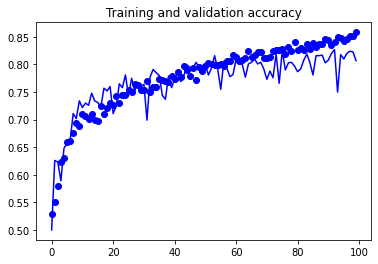

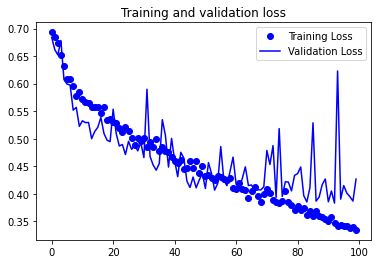

In [12]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()